<h1><center> Part A: Model Code </center></h1>

In [ ]:
# The function euclidean() calulates the distance between two vectors whose data points will be passed as arguments in the func.
# a and b are the two vectors in the given context.
# The function returns the distance, rounded up to two decimal places.


def euclidean(va=[],vb=[]):
    e_dist=(sum((v2-v1)**2 for v1,v2 in zip(va,vb)))**0.5
    return e_dist


In [2]:
# The function manhattan() calulates the distance between two vectors whose data points will be passed as arguments in the func.
# a and b are the two vectors in the given context.
# The function returns the distance, rounded up to two decimal places.


def manhattan(va=[],vb=[]):
    m_dist=sum(abs(v2-v1) for v1,v2 in zip(va,vb))
    return m_dist


In [3]:
# This function is for the binary classification, with two classes labeled as 0 and 1. Accuracy is the ratio that shows how many
# predictions were accurate. And the generalization error is the metric to find out the percentage of inaccurate predictions.

def accuracy_gerror(label,predict,thold=0.5):
    true_count=0 
    pred=[]
    for i in predict:
        if i>=thold:
            pred.append(1)
        else:
            pred.append(0)
    for v1,v2 in zip(label,pred):
        if (v2-v1==0):
            true_count=true_count+1
    acc=(true_count/len(label))*100
    gen_error=100-acc
    return acc,gen_error


In [4]:
# The function metric_data takes in the label vector A, the prediction vector B and the threshold value(by default, it is 0.5).

# In order to calculate precision, recall and the F1 score, we need to know how the predictions differ from the actual values. 
# Since we are dealing with Binary Classification, the label vector consists of 0s and 1s. 0 and 1 represents 
# both the classes, bad and good wines respectively. 
# There are four parameters involved here:- true positives, true negatives, false positives and false negatives.
# Here are how the parameters have been computed:-
# True positives(tp):- When label(v1) is 1 and prediction(v2) is 1
# True negatives(tn):- When label(v1) is 0 and prediction(v2) is 0
# False negatives(fn):- When label(v1) is 1 and prediction(v2) is 0
# False positives(fp):- When label(v1) is 0 and prediction(v2) is 1

# The function precision() computes the precision of the predictions. Precision is a measure of how many of the positive 
# predictions made are correct.

# The function recall() computes the recall of the predictions. Recall is a measure of how many of the positive cases the classifier correctly predicted, over all the actual positive cases 
# in the data.

# F1 score is just the Harmonic mean of precision and recall.




def metric_data(label,predict,thold=0.5):
    tp=tn=fp=fn=0
    pred=[]
    for i in predict:
        if i>=thold:
            pred.append(1)
        else:
            pred.append(0)
    md=[0,0,0,0]
    for v1,v2 in zip(label,pred):
        if (v2==1 and v1==1):
            tp=tp+1
        elif (v2==0 and v1==0):
            tn=tn+1
        elif (v2==0 and v1==1):
            fn=fn+1
        elif (v2==1 and v1==0):
            fp=fp+1
    md[0]=tp
    md[1]=tn
    md[2]=fp
    md[3]=fn
    return md

def precision(tp,fp):
    return tp/(tp+fp)

def recall(tp,fn):
    return tp/(tp+fn)

def f1score(precision=1,recall=1):
    return 2*((precision*recall)/(precision+recall))


In [5]:
# The function confusion_matrix takes in the label vector A, the prediction vector B and the threshold value(by default, it is 0.5).

# There are four parameters involved here:- true positives, true negatives, false positives and false negatives.
# Here are how the parameters have been computed:-
# True positives(tp):- When label(v1) is 1 and prediction(v2) is 1
# True negatives(tn):- When label(v1) is 0 and prediction(v2) is 0
# False negatives(fn):- When label(v1) is 1 and prediction(v2) is 0
# False positives(fp):- When label(v1) is 0 and prediction(v2) is 1 

# The confusion matrix is a performance measure of a binary or multi-class classification problem. 
# Hence, the confusion matrix for binary classification is a matrix like this:- [[TP,FP],[FN,TN]]
# Since we are dealing with Binary Classification, the confusion matrix is calculated by taking in account only two classes(0 and 1).

import numpy as np

def confusion_matrix(label,predict,thold=0.5):
    tp=tn=fp=fn=0
    pred=[]
    for i in predict:
        if i>=thold:
            pred.append(1)
        else:
            pred.append(0)
    for v1,v2 in zip(label,pred):
        if (v2==1 and v1==1):
            tp=tp+1
        elif (v2==0 and v1==0):
            tn=tn+1
        elif (v2==0 and v1==1):
            fn=fn+1
        elif (v2==1 and v1==0):
            fp=fp+1
    md=np.matrix([[tp,fp],[fn,tn]])
    return md



In [6]:
# In order to computer the ROC curve, we need certain metrics like True Positive Rate(Recall/Sensitivity/tpr) and 
# False Positive Rate(fpr). 
# tpr is similar to recall since it shows the number of correct positive predictions over total positive cases.
# fpr is the ratio of negative cases incorrectly predicted as positive cases.
# Hence, tpr=tp/(tp+fn) and fpr=fp/(fp+tn)

# Here, the function roc_metrics() calculates the true positive rate and the false positive rate by
# generating the true positives, true negatives, false positives and false negatives,
# and with regards to a specific variable threshold.

# The function roc_curve() plots the ROC Curve. Here, we are also calculating the gmean for each threshold, since that will 
# help us determine the optimal threshold for which the model performs. It is calculated with specificity and sensitivity.


import numpy as np
import matplotlib.pyplot as plt

def roc_metrics(label,predict,thold=0.5):
    tp=tn=fp=fn=0
    pred=[]
    for i in predict:
        if i>=thold:
            pred.append(1)
        else:
            pred.append(0)
    for v1,v2 in zip(label,pred):
        if (v2==1 and v1==1):
            tp=tp+1
        elif (v2==0 and v1==0):
            tn=tn+1
        elif (v2==0 and v1==1):
            fn=fn+1
        elif (v2==1 and v1==0):
            fp=fp+1
    
    try:
        tpr=tp/(tp+fn)  # In case, there are no true positives and false negatives
    except:
        tpr=1
    try:
        fpr=fp/(fp+tn)  # In case, there are no false positives and true negatives
    except:
        fpr=1
        
    return tpr,fpr


def roc_curve(label,predict):
    f_pr=[]
    t_pr=[]
    g_mean=[]
    prob_t=np.linspace(0,1,100)   # This gives us a thresholds' array = [0,0.01,0.02,0.03,...,0.97,0.98,0.99,1.00].
    for i in prob_t:     # Store the tpr, fpr and gmean for each threshold.
        p,r=roc_metrics(label,predict,i)
        t_pr.append(p)
        f_pr.append(r)
        g_mean.append((p*(1-r))**0.5)  # p = Sensitivity(recall), (1 - r) = Specificity

    plt.plot(f_pr,t_pr)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"The optimal threshold, calculated by the maximum gmean for each threshold is:{max(g_mean)}")
    plt.show()

In [7]:
# The Area Under Curve(auc) is the area covered by our ROC curve.
# Here, the function auc_metrics() calculates the true positive rate and the false positive rate by
# generating the true positives, true negatives, false positives and false negatives.
# The function auc_score() calculates the area under the graph with the Trapezoidal rule.

import numpy as np
import matplotlib.pyplot as plt

def auc_metrics(label,predict,thold=0.5):
    tp=tn=fp=fn=0
    pred=[]
    for i in predict:
        if i>=thold:
            pred.append(1)
        else:
            pred.append(0)
    for v1,v2 in zip(label,pred):
        if (v2==1 and v1==1):
            tp=tp+1
        elif (v2==0 and v1==0):
            tn=tn+1
        elif (v2==0 and v1==1):
            fn=fn+1
        elif (v2==1 and v1==0):
            fp=fp+1
    
    try:
        tpr=tp/(tp+fn)
    except:
        tpr=1
    try:
        fpr=fp/(fp+tn)
    except:
        fpr=1
        
    return tpr,fpr


def auc_score(label,predict):
    f_pr=[]
    t_pr=[]
    prob_t=np.linspace(0,1,100)   # This gives us a thresholds' array = [0,0.01,0.02,0.03,...,0.97,0.98,0.99,1.00].
    for i in prob_t:           # Store the tpr and fpr for each threshold.
        p,r=auc_metrics(label,predict,i)
        t_pr.append(p)
        f_pr.append(r)
        
    
    areas=[]  # Calculate the area under curve, by creating rectangles of consecutive data points and store them in a list.
    for i in range(len(prob_t)-1):  
        f=f_pr[i+1]-f_pr[i]
        t=t_pr[i]+t_pr[i+1]
        areas.append(f*t/2)
    
    area=sum(areas)  # Sum of all the areas, which gives us the total auc.

    plt.plot(f_pr,t_pr)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"AUC={-(area)}")
    plt.show()    

In [8]:
# The precision-recall curve is used for evaluating the performance of binary classification algorithms.
# In order to computer the precision-recall curve, we need certain metrics like true positives, true negatives,
# false positives and false negatives.

# Here, the function pr_metrics() calculates the precision and recall of the predictions
# with regards to a specific variable threshold.
# The function pr_curve() plots the precision-recall Curve.

import numpy as np
import matplotlib.pyplot as plt

def pr_metrics(label,predict,thold=0.5):
    tp=tn=fp=fn=0
    pred=[]
    md=[0,0,0,0]
    for i in predict:
        if i>=thold:
            pred.append(1)
        else:
            pred.append(0)
    for v1,v2 in zip(label,pred):
        if (v2==1 and v1==1):
            tp=tp+1
        elif (v2==0 and v1==0):
            tn=tn+1
        elif (v2==0 and v1==1):
            fn=fn+1
        elif (v2==1 and v1==0):
            fp=fp+1
            
    try:                         # In case the classifier classifies no positives.
        precision=tp/(tp+fp)
    except:
        precision=1
    try:
        recall=tp/(tp+fn)        # In case the classifier classifies all the points as negatives.
    except:
        recall=1
    
    return precision,recall

def pr_curve(label,predict):
    pre=[]
    rec=[]
    prob_t=np.linspace(0,1,100)   # This gives us a thresholds' array = [0,0.01,0.02,0.03,...,0.97,0.98,0.99,1.00].
    for i in prob_t:
        p,r=pr_metrics(label,predict,i)
        pre.append(p)
        rec.append(r)

    plt.plot(rec,pre)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.show()    

In [9]:
class KNN_Classifier:
    
    # create method 'fit', and store the instance variables in this class.
    # X=train features
    # y=train targets(labels,0/1)
    # n_neighbors=the number of neighbors to be taken into account(k) (always >0)
    # weights is either 'uniform' or 'distance'.
    # **kwargs will store the distance measure to be used in knn.Either Euclidean of Manhattan.
    
    def fit(self, X, Y, n_neighbors: int, weights='uniform', **kwargs):
        assert n_neighbors>0,"Invalid number of neigbors"
        assert (weights=="uniform" or weights=="distance"),"Invalid weights"
        self.x=X
        self.y=Y
        self.kn=n_neighbors
        self.w=weights
        self.kw=kwargs
    
    # This method will contain the primary logic behind the knn algorithm. With the testing set as the argument.
    def predict(self,X):
        self.x_t=X
        pred=[]        # This is the array where all the predictions will be stored.
        
        for j in range(0,len(self.x_t)):     # The logic behind knn algo for each data field in the test set.
            dis=[]
            points=[]
            for i in range(0,len(self.x)):
                dist=self.kw['odis'](self.x[i],self.x_t[j])
                dis.append(dist)
                points.append(i)
                
                
            d=list(zip(dis,points))
            df_knn=pd.DataFrame(d,columns=['distance','index'])  # Create a dataframe of the points and their distance with the test point.
            df_knn=df_knn.sort_values(by=['distance'])  # Sort the dataframe by the distances, in ascending order.
            df_knn=df_knn[:self.kn]  # Modify the dataframe such that only first n rows remain. n being the no.of neighbours.
            df_knn=df_knn.reset_index(drop=True) # Reset the indices.
            
            indices=[]
            inv=[]
            
            # Here, we are to predict the class based on different weights for distances.
            if self.w=='distance':
                for i in range(len(df_knn)):    # The inverses of distances(column 'inv') will be added in the dataframe df_knn. 
                    if(df_knn['distance'].iloc[i]==0):
                        inv.append(1/0.00001)
                        continue
                    c=1/df_knn['distance'].iloc[i]
                    inv.append(c)
                df_knn['inv']=inv
                invdist_sum=sum(df_knn['inv'])  # Total sum of all the inverse distances.
                
                for p in df_knn['index']:
                    indices.append(self.y[p])
                df_knn['label']=indices         # Create a new column 'label' with the actual classes for the test data points.
                labels=set(indices)
                l_list=list(labels)
                votes=dict()                    # The weights will be calculated by votes. More votes means higher weightage.
                
                # In this loop, weights of each label will be calculate. Since, we are doing binary classification
                # this loop will run atmost 2 times.
                for i in l_list:
                    ty=df_knn.where(df_knn['label']==i)
                    ty=ty.dropna()               
                    sum_ty=sum(ty['inv'])
                    votes[i]=sum_ty/invdist_sum
                votes_order=sorted(votes.items(),key=lambda x:x[1],reverse=True)   # Dictionary of lables and their weights.
                
                if votes_order[0][0]==0:
                    pred.append(1-votes_order[0][1])
                else:
                    pred.append(votes_order[0][1])
            
            # Here, we are to predict the class based on just the max no.of neighbours and take weights of distances as uniform.
            else:
                for p in df_knn['index']:  # The actual classes for the test data points.
                    indices.append(self.y[p])
                max_label=max(set(indices),key=indices.count)  # Most no.of label classes.
                
                # prob_label is the probability of the class label, among the other class labels of the neighbours. 
                # So for example, if k=5, 4's are 1, the probablity of our test set class label being 1 is 0.8%, 
                # and being 0, 0.2%.
                prob_label=indices.count(max_label)/self.kn    
                
                if max_label==0:
                    prob_label=1-prob_label
                pred.append(prob_label)
            
        
        
        # Hence, instead of classifying as 0 or 1, we append the probability of the max occurring class. 
        # We could have returned the predictions as either 0 or 1. However, by doing that the prediction of the test set 
        # remains independent of the threshold value, that will be used to determine whether the class label is to be
        # classified as 0 or 1.
        return pred
    
    
    def __init__(self):
        pass


<h1><center> Part B: Data Processing </center></h1>

In [10]:
# Pandas library has a function for reading csv files. Since pandas work with its data type called DataFrame, read_csv 
# automatically converts the file into a DataFrame object. However, if we were to not use the function, we would have to 
# convert the dataset into a DataFrame object by the method pandas.DataFram(data).

import pandas as pd

data=pd.read_csv("winequality-white.csv",sep=";") # the data fields were split by ';', hence we used a seperator(sep) for it.
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4898 rows x 12 columns]

In [11]:
for i in range(len(data['quality'])):
    if data['quality'][i]<=5:
        data['quality'][i]=0
    else:
        data['quality'][i]=1

print(data['quality'])

C:\Users\asus_\AppData\Local\Temp\ipykernel_20552\722822603.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['quality'][i]=1
C:\Users\asus_\AppData\Local\Temp\ipykernel_20552\722822603.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['quality'][i]=0


0       1
1       1
2       1
3       1
4       1
       ..
4893    1
4894    0
4895    1
4896    1
4897    1
Name: quality, Length: 4898, dtype: int64


In [12]:
# After converting the quality into good or bad quality wines, we have 1640 as 0 class label(bad), 3258 as 1 class label(good).

bad_count=good_count=0
for i in range(len(data['quality'])):
    if data['quality'][i]==0:
        bad_count=bad_count+1
    else:
        good_count=good_count+1
print("Total bad quality wines:",bad_count)
print("Total good quality wines:",good_count)


# OR

# data['quality'].value_counts()

Total bad quality wines: 1640
Total good quality wines: 3258


In [13]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     0.665169  
std       0.151001     0.114126     1.230621     0.471979  
min       2.720000     0.220000     8.000000     0.000000  
25%       3.090000     0.410000     9.500000     0.000000  
50%       3.180000     0.470000    10.400000     1.000000  
75%       3.280000     0.550000    11.400000     1.000000  
max       3.820000     1.080000    14.200000     1.000000

In [14]:
# To check the data types of all the features

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [15]:
# check for any null values

data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### <font color="red"><i><bold>Outlier analysis</bold></i></font>

In [16]:
# From the output of data.describe(), we can clearly see that while there are no null values in the data, some fields have a 
# huge difference between its max and the 3rd quartile, and some with less values than min. Hence, we will work on removing
# the data points that can negatively effect the model, through the Inter Quartile Range(iqr). IQR is the difference between
# the third quartile value and the first quartile value.

import seaborn as sns

<AxesSubplot: >

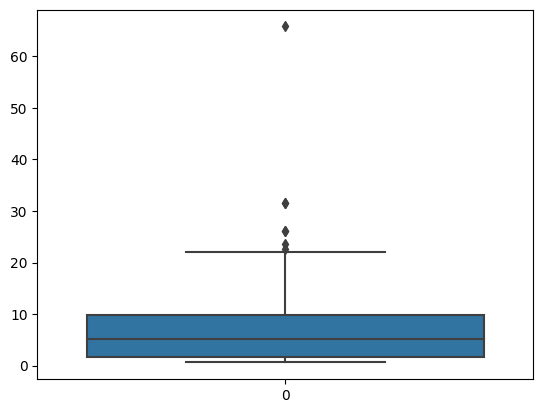

In [17]:
sns.boxplot(data['residual sugar'])

In [18]:
rsugarq3=np.percentile(data['residual sugar'],75,interpolation='midpoint')
rsugarq1=np.percentile(data['residual sugar'],25,interpolation='midpoint')
rsugar_iqr=rsugarq3-rsugarq1

plot_max = rsugarq3 + (1.5*rsugar_iqr)

outliers=[]
print(data.shape)
for i in range(len(data['residual sugar'])):
    if data['residual sugar'][i]>=plot_max:
        outliers.append(i)
        
data.drop(outliers,inplace=True)
data = data.reset_index(drop=True)
print(data.shape)

(4898, 12)
(4891, 12)


C:\Users\asus_\AppData\Local\Temp\ipykernel_20552\2818736068.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  rsugarq3=np.percentile(data['residual sugar'],75,interpolation='midpoint')
C:\Users\asus_\AppData\Local\Temp\ipykernel_20552\2818736068.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  rsugarq1=np.percentile(data['residual sugar'],25,interpolation='midpoint')


<AxesSubplot: >

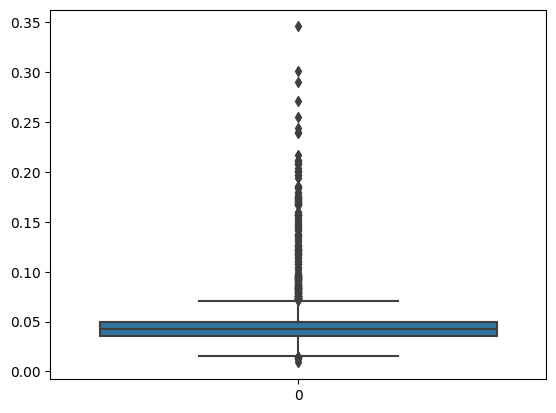

In [19]:
# Here, we can see that there are values that are unordinarily less.
# It is so often noted that when there are a lot of elements that are perceived as outliers because
# their values are much greater than (Q3 +1.5*IQR), it can be a case that the data is negatively skewed. Hence we can try to 
# remove the values below the (Q1 -1.5*IQR).
sns.boxplot(data['chlorides'])

In [20]:
clq3=np.percentile(data['chlorides'],75,interpolation='midpoint')
clq1=np.percentile(data['chlorides'],25,interpolation='midpoint')
cl_iqr=clq3-clq1

plot_max = clq3 + (1.5*cl_iqr)
plot_min = clq1 - (1.5*cl_iqr)

outliers=[]
print(data.shape)
for i in range(len(data['chlorides'])):
    if (data['chlorides'].iloc[i]<=plot_min or data['chlorides'].iloc[i]>=plot_max):
        outliers.append(i)
        
# print(len(outliers))
data.drop(outliers,inplace=True)
data = data.reset_index(drop=True)
print(data.shape)

C:\Users\asus_\AppData\Local\Temp\ipykernel_20552\1734318658.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  clq3=np.percentile(data['chlorides'],75,interpolation='midpoint')
C:\Users\asus_\AppData\Local\Temp\ipykernel_20552\1734318658.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  clq1=np.percentile(data['chlorides'],25,interpolation='midpoint')


(4891, 12)
(4685, 12)


<AxesSubplot: >

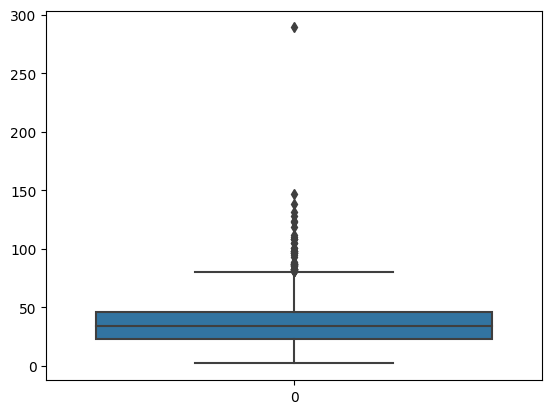

In [21]:
sns.boxplot(data['free sulfur dioxide'])

In [22]:
fsdq3=np.percentile(data['free sulfur dioxide'],75,interpolation='midpoint')
fsdq1=np.percentile(data['free sulfur dioxide'],25,interpolation='midpoint')
fsd_iqr=fsdq3-fsdq1

plot_max = fsdq3 + (1.5*fsd_iqr)
plot_min = fsdq1 - (1.5*fsd_iqr)

outliers=[]
print(data.shape)
for i in range(len(data['free sulfur dioxide'])):
    if data['free sulfur dioxide'].iloc[i]>=plot_max:
        outliers.append(i)
        
# print(len(outliers))
data.drop(outliers,inplace=True)
data = data.reset_index(drop=True)
print(data.shape)

(4685, 12)
(4636, 12)


C:\Users\asus_\AppData\Local\Temp\ipykernel_20552\421181872.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  fsdq3=np.percentile(data['free sulfur dioxide'],75,interpolation='midpoint')
C:\Users\asus_\AppData\Local\Temp\ipykernel_20552\421181872.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  fsdq1=np.percentile(data['free sulfur dioxide'],25,interpolation='midpoint')


<AxesSubplot: >

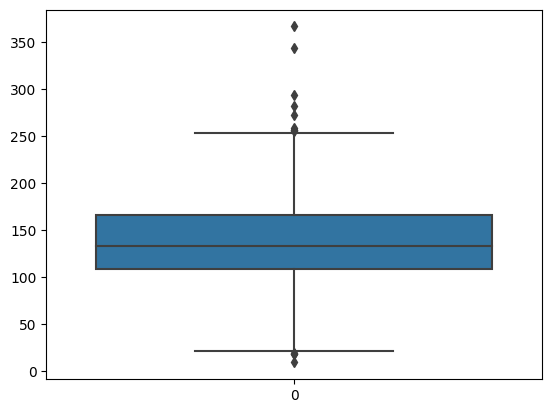

In [23]:
sns.boxplot(data['total sulfur dioxide'])

In [24]:
tsdq3=np.percentile(data['total sulfur dioxide'],75,interpolation='midpoint')
tsdq1=np.percentile(data['total sulfur dioxide'],25,interpolation='midpoint')
tsd_iqr=tsdq3-tsdq1

plot_max = tsdq3 + (1.5*tsd_iqr)
plot_min = tsdq1 - (1.5*tsd_iqr)

outliers=[]
print(data.shape)
for i in range(len(data['total sulfur dioxide'])):
    if (data['total sulfur dioxide'].iloc[i]>=plot_max or data['total sulfur dioxide'].iloc[i]<=plot_min):
        outliers.append(i)
        
data.drop(outliers,inplace=True)
data = data.reset_index(drop=True)
print(data.shape)

C:\Users\asus_\AppData\Local\Temp\ipykernel_20552\3588957438.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  tsdq3=np.percentile(data['total sulfur dioxide'],75,interpolation='midpoint')
C:\Users\asus_\AppData\Local\Temp\ipykernel_20552\3588957438.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  tsdq1=np.percentile(data['total sulfur dioxide'],25,interpolation='midpoint')


(4636, 12)
(4619, 12)


<AxesSubplot: >

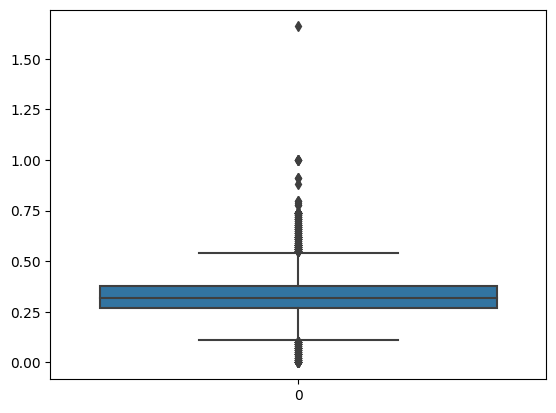

In [25]:
sns.boxplot(data['citric acid'])

In [26]:
caq3=np.percentile(data['citric acid'],75,interpolation='midpoint')
caq1=np.percentile(data['citric acid'],25,interpolation='midpoint')
ca_iqr=caq3-caq1

plot_max = caq3 + (1.5*ca_iqr)
plot_min = caq1 - (1.5*ca_iqr)

outliers=[]
print(data.shape)
for i in range(len(data['citric acid'])):
    if (data['citric acid'].iloc[i]>=plot_max or data['citric acid'].iloc[i]<=plot_min):
        outliers.append(i)
        
data.drop(outliers,inplace=True)
data = data.reset_index(drop=True)
print(data.shape)

(4619, 12)


C:\Users\asus_\AppData\Local\Temp\ipykernel_20552\3637249597.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  caq3=np.percentile(data['citric acid'],75,interpolation='midpoint')
C:\Users\asus_\AppData\Local\Temp\ipykernel_20552\3637249597.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  caq1=np.percentile(data['citric acid'],25,interpolation='midpoint')


(4332, 12)


<AxesSubplot: >

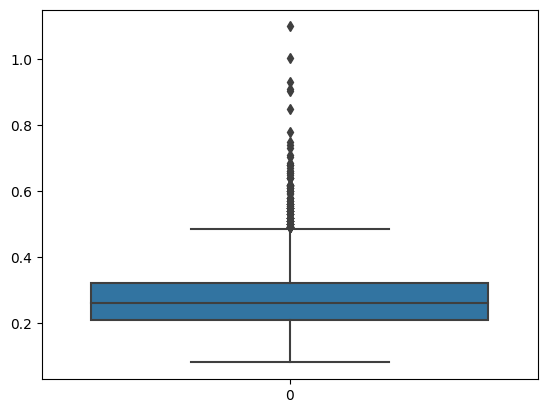

In [27]:
sns.boxplot(data['volatile acidity'])

In [28]:
vaq3=np.percentile(data['volatile acidity'],75,interpolation='midpoint')
vaq1=np.percentile(data['volatile acidity'],25,interpolation='midpoint')
va_iqr=vaq3-vaq1

plot_max = vaq3 + (1.5*va_iqr)
plot_min = vaq1 - (1.5*va_iqr)

outliers=[]
print(data.shape)
for i in range(len(data['volatile acidity'])):
    if (data['volatile acidity'].iloc[i]>=plot_max or data['volatile acidity'].iloc[i]<=plot_min):
        outliers.append(i)
        
data.drop(outliers,inplace=True)
data = data.reset_index(drop=True)
print(data.shape)

(4332, 12)


C:\Users\asus_\AppData\Local\Temp\ipykernel_20552\3360278343.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  vaq3=np.percentile(data['volatile acidity'],75,interpolation='midpoint')
C:\Users\asus_\AppData\Local\Temp\ipykernel_20552\3360278343.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  vaq1=np.percentile(data['volatile acidity'],25,interpolation='midpoint')


(4217, 12)


<AxesSubplot: >

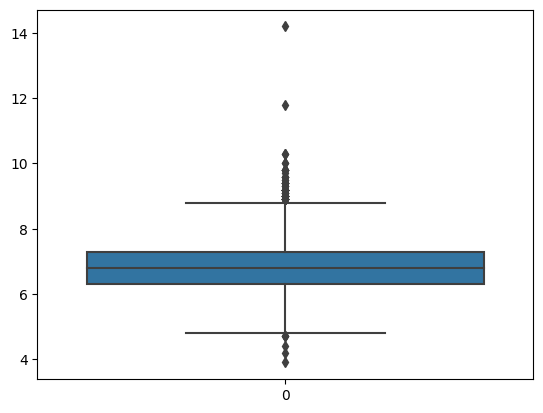

In [29]:
sns.boxplot(data['fixed acidity'])

In [30]:
faq3=np.percentile(data['fixed acidity'],75,interpolation='midpoint')
faq1=np.percentile(data['fixed acidity'],25,interpolation='midpoint')
fa_iqr=faq3-faq1

plot_max = faq3 + (1.5*fa_iqr)
plot_min = faq1 - (1.5*fa_iqr)

outliers=[]
print(data.shape)
for i in range(len(data['fixed acidity'])):
    if (data['fixed acidity'].iloc[i]>=plot_max or data['fixed acidity'].iloc[i]<=plot_min):
        outliers.append(i)
        
data.drop(outliers,inplace=True)
data = data.reset_index(drop=True)
print(data.shape)

(4217, 12)
(4108, 12)


C:\Users\asus_\AppData\Local\Temp\ipykernel_20552\1947468645.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  faq3=np.percentile(data['fixed acidity'],75,interpolation='midpoint')
C:\Users\asus_\AppData\Local\Temp\ipykernel_20552\1947468645.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  faq1=np.percentile(data['fixed acidity'],25,interpolation='midpoint')


<AxesSubplot: >

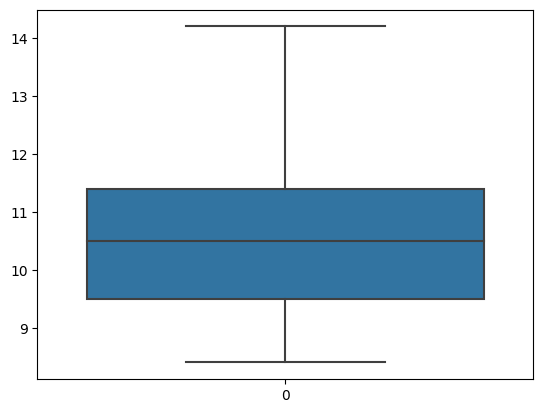

In [31]:
sns.boxplot(data['alcohol'])

In [33]:
# The updated dataset

data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4108.000000       4108.000000  4108.000000     4108.000000   
mean        6.801716          0.262463     0.323077        6.318513   
std         0.730014          0.076659     0.082865        4.906581   
min         4.900000          0.080000     0.110000        0.600000   
25%         6.300000          0.210000     0.270000        1.787500   
50%         6.800000          0.260000     0.310000        5.200000   
75%         7.300000          0.310000     0.370000        9.600000   
max         8.700000          0.485000     0.540000       22.000000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4108.000000          4108.000000           4108.000000  4108.000000   
mean      0.042315            34.844572            136.866358     0.993858   
std       0.009942            15.064018             40.731643     0.002883   
min       0.015000             2.000000             24.000000     0.987110   
25%       0.035000            24.000000            107.000000     0.991600   
50%       0.042000            34.000000            133.000000     0.993520   
75%       0.049000            45.000000            166.000000     0.995873   
max       0.071000            80.000000            252.000000     1.001960   

                pH    sulphates      alcohol      quality  
count  4108.000000  4108.000000  4108.000000  4108.000000  
mean      3.195365     0.490986    10.596510     0.707400  
std       0.147942     0.112903     1.215032     0.455012  
min       2.790000     0.220000     8.400000     0.000000  
25%       3.100000     0.410000     9.500000     0.000000  
50%       3.180000     0.480000    10.500000     1.000000  
75%       3.290000     0.550000    11.400000     1.000000  
max       3.820000     1.080000    14.200000     1.000000

In [34]:
# The function sample(frac=1) will return the shuffled data. However, all the fields will be shuffled.
# Which means that the index will also be no longer be in ascending form. Hence to solve this,
# we can include the reset_index() method. So that the index resets to the default order, with the fields being shuffled.

data=data.sample(frac=1,random_state=50).reset_index()
data

index  fixed acidity  volatile acidity  citric acid  residual sugar  \
0      2972            6.4              0.28         0.36            1.30   
1      2576            7.1              0.36         0.37            4.80   
2      3786            6.8              0.40         0.29            2.80   
3      1058            6.8              0.24         0.40            1.80   
4       233            7.5              0.17         0.44           11.30   
...     ...            ...               ...          ...             ...   
4103   3330            5.4              0.15         0.32            2.50   
4104     70            6.8              0.25         0.31           13.30   
4105    132            7.5              0.29         0.31            8.95   
4106   2014            6.5              0.18         0.33            1.40   
4107   1931            6.1              0.36         0.41           19.35   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.053                 28.0                 186.0  0.99211  3.31   
1         0.019                 39.0                 114.0  0.99036  3.08   
2         0.044                 27.0                  97.0  0.99040  3.12   
3         0.047                 34.0                 105.0  0.99000  3.13   
4         0.046                 65.0                 146.0  0.99700  3.17   
...         ...                  ...                   ...      ...   ...   
4103      0.037                 10.0                  51.0  0.98878  3.04   
4104      0.050                 69.0                 202.0  0.99720  3.22   
4105      0.055                 20.0                 151.0  0.99680  3.08   
4106      0.029                 35.0                 138.0  0.99114  3.36   
4107      0.070                 67.0                 207.0  1.00118  3.39   

      sulphates  alcohol  quality  
0          0.45     10.8        0  
1          0.49     12.7        1  
2          0.42     11.2        1  
3          0.49     12.8        1  
4          0.45     10.0        1  
...         ...      ...      ...  
4103       0.58     12.6        1  
4104       0.48      9.7        1  
4105       0.54      9.3        0  
4106       0.60     11.5        1  
4107       0.53      9.1        0  

[4108 rows x 13 columns]

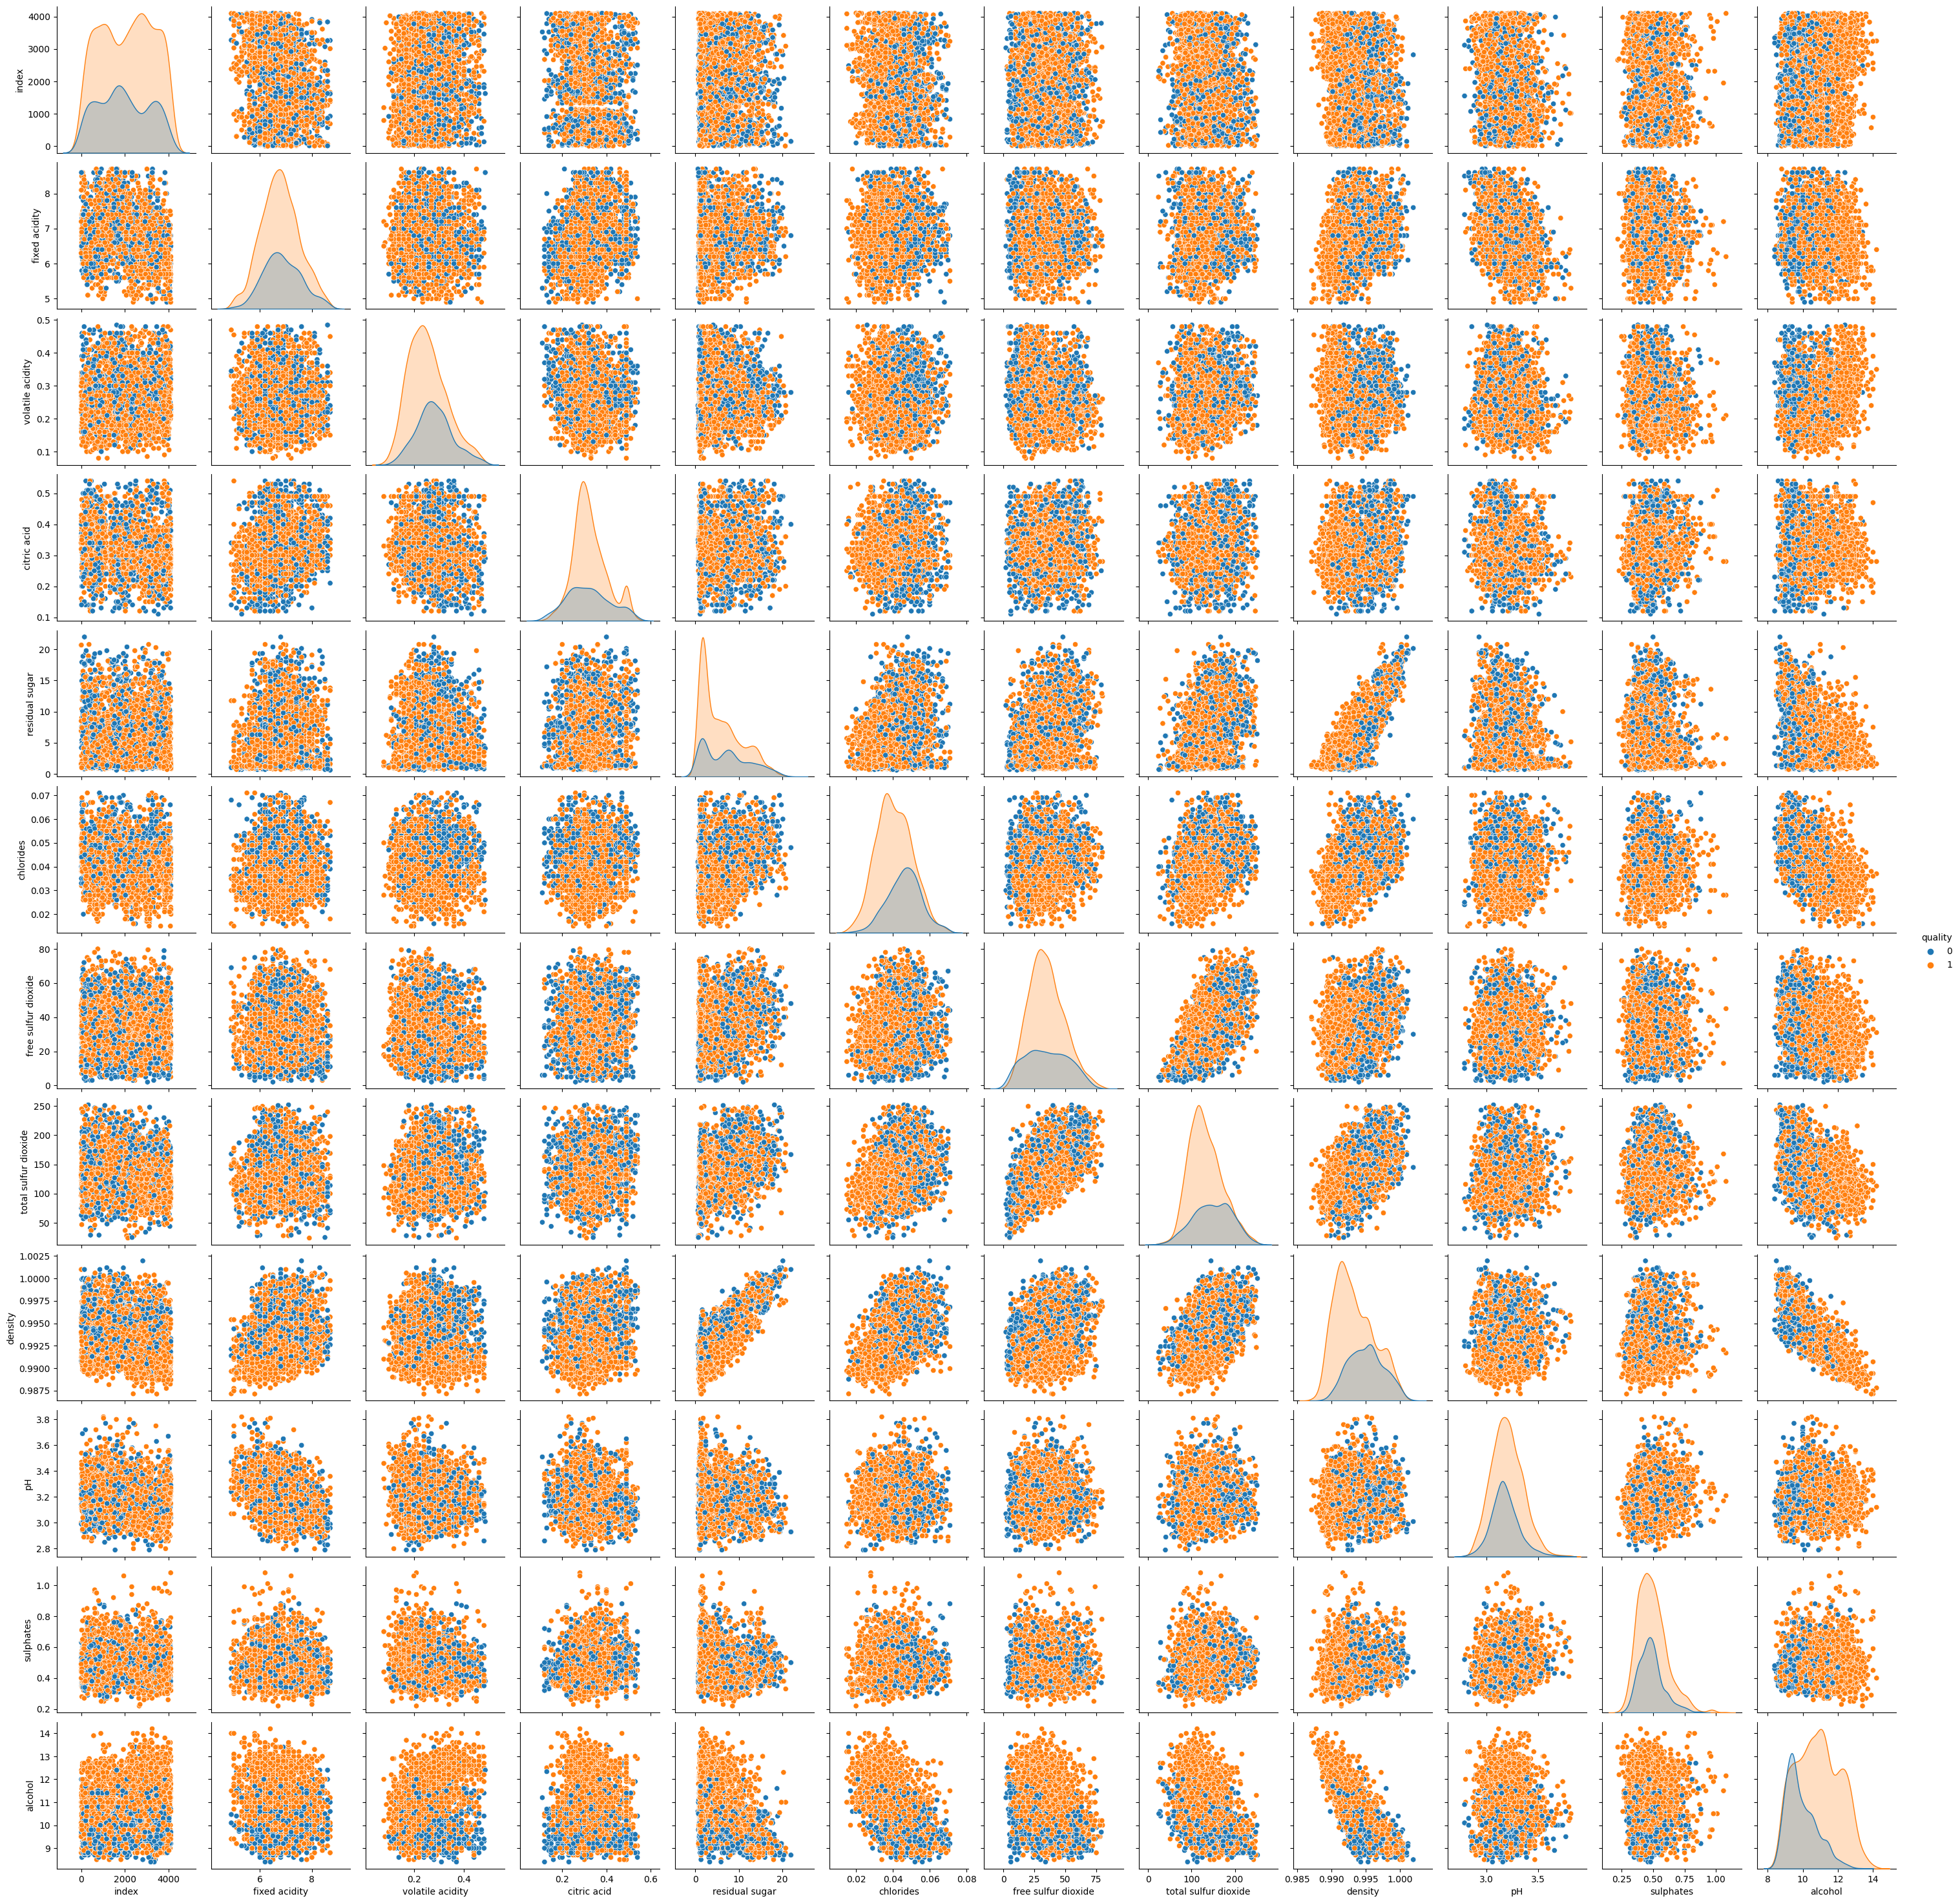

In [34]:
# The blue points and areas are of the 0 class. The orange ones are of the 1 class. Pairplots are symmetrical matrices.
# Which means that either side of the diagonal is a mirror image of each other.
# The graphic here shows the correlation between the features, with respect to the target('quality').

import seaborn as sns

sns.pairplot(data,hue="quality")

In [35]:
# Correlation among the dimensions.

data_corr=data.corr()
corr_target=data.corr()[['quality']].sort_values(by="quality",ascending=False)

data_corr

index  fixed acidity  volatile acidity  citric acid  \
index                 1.000000      -0.269484          0.043796    -0.161590   
fixed acidity        -0.269484       1.000000         -0.042334     0.255203   
volatile acidity      0.043796      -0.042334          1.000000    -0.130145   
citric acid          -0.161590       0.255203         -0.130145     1.000000   
residual sugar        0.018323       0.081111          0.069932     0.016754   
chlorides            -0.073179       0.110331         -0.037154     0.028592   
free sulfur dioxide  -0.010600      -0.018448         -0.061656     0.087976   
total sulfur dioxide -0.165370       0.086427          0.118183     0.085920   
density              -0.180068       0.236889         -0.026683     0.062080   
pH                   -0.162352      -0.381306         -0.059592    -0.091979   
sulphates            -0.001346      -0.018331         -0.047605     0.086364   
alcohol               0.195681      -0.103673          0.128863    -0.001122   
quality               0.051371      -0.055811         -0.166094     0.026531   

                      residual sugar  chlorides  free sulfur dioxide  \
index                       0.018323  -0.073179            -0.010600   
fixed acidity               0.081111   0.110331            -0.018448   
volatile acidity            0.069932  -0.037154            -0.061656   
citric acid                 0.016754   0.028592             0.087976   
residual sugar              1.000000   0.286777             0.351292   
chlorides                   0.286777   1.000000             0.174392   
free sulfur dioxide         0.351292   0.174392             1.000000   
total sulfur dioxide        0.412194   0.381644             0.620972   
density                     0.840014   0.516032             0.347167   
pH                         -0.199555  -0.007503            -0.005735   
sulphates                  -0.053294   0.062898             0.052107   
alcohol                    -0.491976  -0.560848            -0.268361   
quality                    -0.116227  -0.247463            -0.002853   

                      total sulfur dioxide   density        pH  sulphates  \
index                            -0.165370 -0.180068 -0.162352  -0.001346   
fixed acidity                     0.086427  0.236889 -0.381306  -0.018331   
volatile acidity                  0.118183 -0.026683 -0.059592  -0.047605   
citric acid                       0.085920  0.062080 -0.091979   0.086364   
residual sugar                    0.412194  0.840014 -0.199555  -0.053294   
chlorides                         0.381644  0.516032 -0.007503   0.062898   
free sulfur dioxide               0.620972  0.347167 -0.005735   0.052107   
total sulfur dioxide              1.000000  0.552648  0.012311   0.102718   
density                           0.552648  1.000000 -0.051158   0.073532   
pH                                0.012311 -0.051158  1.000000   0.154527   
sulphates                         0.102718  0.073532  0.154527   1.000000   
alcohol                          -0.475055 -0.822113  0.067840  -0.050413   
quality                          -0.180206 -0.271647  0.052806   0.038178   

                       alcohol   quality  
index                 0.195681  0.051371  
fixed acidity        -0.103673 -0.055811  
volatile acidity      0.128863 -0.166094  
citric acid          -0.001122  0.026531  
residual sugar       -0.491976 -0.116227  
chlorides            -0.560848 -0.247463  
free sulfur dioxide  -0.268361 -0.002853  
total sulfur dioxide -0.475055 -0.180206  
density              -0.822113 -0.271647  
pH                    0.067840  0.052806  
sulphates            -0.050413  0.038178  
alcohol               1.000000  0.361668  
quality               0.361668  1.000000

In [36]:
# Correlation with the target. More the absolute value of the correlation, more the correlation.

corr_target

quality
quality               1.000000
alcohol               0.361668
pH                    0.052806
index                 0.051371
sulphates             0.038178
citric acid           0.026531
free sulfur dioxide  -0.002853
fixed acidity        -0.055811
residual sugar       -0.116227
volatile acidity     -0.166094
total sulfur dioxide -0.180206
chlorides            -0.247463
density              -0.271647

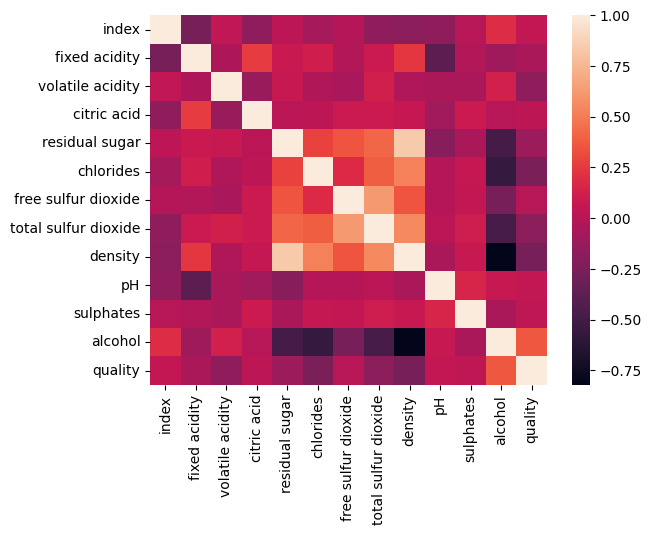

In [37]:
# The heatmap from seaborn helps us to understand the correlations between features and targets. Bar the diagonal, 
# the darker the shade is, more is the inverse correlation between the two. Similarly, the lighter the shade gets,
# more is the direct correlation between them.

import seaborn as sns
ax=sns.heatmap(data_corr)
plt.show()

In [38]:
# Correlation of other features with 'density'. 

dataf=data.corr()[['density']].sort_values(by="density",ascending=False)

dataf

density
density               1.000000
residual sugar        0.840014
total sulfur dioxide  0.552648
chlorides             0.516032
free sulfur dioxide   0.347167
fixed acidity         0.236889
sulphates             0.073532
citric acid           0.062080
volatile acidity     -0.026683
pH                   -0.051158
index                -0.180068
quality              -0.271647
alcohol              -0.822113

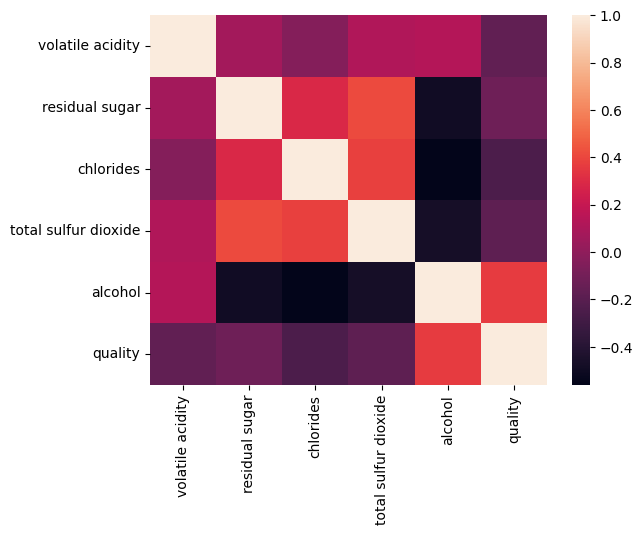

In [39]:
# Anything with very less correlation is removed, correlation of less than 10%,
# since that won't be a well-depending factor for classification.
# 'density' is comparatively well-correlated with the target variable, however it is also highly correlated with the other 
# features. Due to this, the model might give incorrect results and performance would be affected. 
# Hence, 'density' feature can be considered as redundant. Also, the model performs better without it.

data=data.drop(['index','density','citric acid','sulphates','free sulfur dioxide','pH','fixed acidity'],axis=1)

ax=sns.heatmap(data.corr())
plt.show()

In [40]:
data.corr()

volatile acidity  residual sugar  chlorides  \
volatile acidity              1.000000        0.069932  -0.037154   
residual sugar                0.069932        1.000000   0.286777   
chlorides                    -0.037154        0.286777   1.000000   
total sulfur dioxide          0.118183        0.412194   0.381644   
alcohol                       0.128863       -0.491976  -0.560848   
quality                      -0.166094       -0.116227  -0.247463   

                      total sulfur dioxide   alcohol   quality  
volatile acidity                  0.118183  0.128863 -0.166094  
residual sugar                    0.412194 -0.491976 -0.116227  
chlorides                         0.381644 -0.560848 -0.247463  
total sulfur dioxide              1.000000 -0.475055 -0.180206  
alcohol                          -0.475055  1.000000  0.361668  
quality                          -0.180206  0.361668  1.000000

### <font color="red"><i><bold>Data duplication</bold></i></font>

In [39]:
# With the below code we can know whether there are duplicated rows.

dupl=data[data.duplicated()]
dupl

volatile acidity  residual sugar  chlorides  total sulfur dioxide  \
62                0.25            7.20      0.048                 207.0   
96                0.33            1.80      0.031                 159.0   
115               0.21            2.90      0.046                 121.0   
169               0.30            2.80      0.025                 107.0   
184               0.43           13.00      0.033                 158.0   
...                ...             ...        ...                   ...   
4095              0.22            1.10      0.034                  90.0   
4098              0.35            6.50      0.028                  87.0   
4101              0.38           13.65      0.048                 189.0   
4102              0.33           17.20      0.037                 170.0   
4103              0.18            5.20      0.051                 157.0   

      alcohol  quality  
62        9.2        0  
96       11.0        1  
115      10.9        1  
169      11.3        1  
184      11.3        1  
...       ...      ...  
4095     12.6        1  
4098     11.4        1  
4101      9.5        1  
4102      9.4        1  
4103     10.6        1  

[828 rows x 6 columns]

In [40]:
data.duplicated().any()

True

In [73]:
# Removing the duplicate rows.

print(data.shape)
data=data.drop_duplicates(keep='first')
print(data.shape)

(4108, 6)
(3280, 6)


In [74]:
data = data.reset_index(drop=True)

In [41]:
# The partition function is used for splitting the data into training and testing sets.

def partition(features,target,t):
    fea_test=features[:int(features.shape[0]*t)]
    tar_test=target[:int(features.shape[0]*t)]
    fea_train=features[int(features.shape[0]*t):]
    tar_train=target[int(features.shape[0]*t):]
    return fea_test,tar_test,fea_train,tar_train

data_target=data['quality']
data_features=data.drop(['quality'],axis=1)

test_fea,test_tar,train_fea,train_tar=partition(data_features,data_target,0.2)
print("Training set of feature matrix:",train_fea.shape)
print("Testing set of features matrix:",test_fea.shape)
print("Training set of target vector:",train_tar.shape)
print("Testing set of target vector:",test_tar.shape)

Training set of feature matrix: (3287, 5)
Testing set of features matrix: (821, 5)
Training set of target vector: (3287,)
Testing set of target vector: (821,)


In [42]:
# After converting the quality into good or bad quality wines, we have roughly 33% of the total targets as 0 class labels(bad)
# and the rest as 1 class labels(good).

bad_count=good_count=0
for i in range(len(data['quality'])):
    if data['quality'][i]==0:
        bad_count=bad_count+1
    else:
        good_count=good_count+1
print("Total bad quality wines:",bad_count)
print("Total good quality wines:",good_count)

Total bad quality wines: 1202
Total good quality wines: 2906


In [43]:
# converting the data in to numpy arrays

train_fea=train_fea.to_numpy()
test_fea=test_fea.to_numpy()
train_tar=train_tar.to_numpy()
test_tar=test_tar.to_numpy()

print(type(test_fea))

<class 'numpy.ndarray'>


<h1><center> Part C : Model Evaluation </center></h1>

In [44]:
# Calling the methods of the KNN_Classifier by creating its object.
# Here, the 10% of the predictions are also printed, just for information.

knn=KNN_Classifier()
knn.fit(train_fea,train_tar,5,'uniform',odis=euclidean)
predictions=knn.predict(test_fea)
for i in range(0,int(len(predictions)*0.1)):
    print(predictions[i],end=' ')

0.4 0.8 0.8 1.0 0.4 1.0 0.8 0.4 0.4 0.4 1.0 0.8 0.4 1.0 1.0 0.6 0.8 1.0 1.0 0.4 0.8 1.0 0.8 0.6 0.8 0.8 0.8 0.6 0.4 0.19999999999999996 0.6 0.4 0.19999999999999996 0.6 0.8 1.0 1.0 0.4 0.6 0.6 0.6 1.0 0.19999999999999996 0.8 1.0 1.0 1.0 1.0 1.0 1.0 0.8 1.0 0.8 0.6 1.0 0.6 0.6 0.4 1.0 1.0 1.0 0.6 0.8 1.0 0.6 0.6 0.8 0.8 0.6 1.0 0.8 0.6 0.8 0.6 0.8 0.19999999999999996 1.0 0.0 1.0 0.8 1.0 1.0 

In [45]:
acc,g_error=accuracy_gerror(test_tar,predictions)
precision,recall=pr_metrics(test_tar,predictions)
f1_score=f1score(precision,recall)
print(f"Accuracy:{acc}\nPrecision:{precision}\nRecall:{recall}\nF1 Score:{f1_score}")

Accuracy:72.10718635809987
Precision:0.7824
Recall:0.8402061855670103
F1 Score:0.8102734051367025


In [46]:
# Standard scaling of the data. Subtract the feature's mean from the value, and then divide it by the feature's std.

data_scaled=data_features
print(len(data_scaled.columns))
for i in data_scaled.columns:
    data_scaled[i]=(data_scaled[i]-np.mean(data_scaled[i]))/np.std(data_scaled[i])


5


In [62]:
data_scaled.to_csv("scaled dataset.csv",index=False)

In [47]:
# Splitting the data into training and testing sets. Like Q.16.

scaled_test_fea,scaled_test_tar,scaled_train_fea,scaled_train_tar=partition(data_scaled,data_target,0.2)


scaled_train_fea=scaled_train_fea.to_numpy()
scaled_test_fea=scaled_test_fea.to_numpy()
scaled_train_tar=scaled_train_tar.to_numpy()
scaled_test_tar=scaled_test_tar.to_numpy()

print("Training set of feature matrix:",scaled_train_fea.shape)
print("Testing set of features matrix:",scaled_test_fea.shape)
print("Training set of target vector:",scaled_train_tar.shape)
print("Testing set of target vector:",scaled_test_tar.shape)

Training set of feature matrix: (3287, 5)
Testing set of features matrix: (821, 5)
Training set of target vector: (3287,)
Testing set of target vector: (821,)


In [48]:
# Making the model of the scaled data.

knn_scaled=KNN_Classifier()
knn_scaled.fit(scaled_train_fea,scaled_train_tar,5,'uniform',odis=euclidean)
predictions_scaled=knn_scaled.predict(scaled_test_fea)

# Comparing the results with performance measures like accuracy and f1score.

acc_scaled,g_error_scaled=accuracy_gerror(scaled_test_tar,predictions_scaled)
precision_scaled,recall_scaled=pr_metrics(scaled_test_tar,predictions_scaled)
f1_score_scaled=f1score(precision_scaled,recall_scaled)

print(f"Accuracy:{acc_scaled}\nPrecision:{precision_scaled}\nRecall:{recall_scaled}\nF1 Score:{f1_score_scaled}")

Accuracy:77.46650426309378
Precision:0.8186195826645265
Recall:0.8762886597938144
F1 Score:0.8464730290456433


In [49]:
print(f"Accuracy:\n Without standadization:{acc}\n With standardization:{acc_scaled}")
print(f"F1 score:\n Without standadization:{f1_score}\n With standardization:{f1_score_scaled}")

Accuracy:
 Without standadization:72.10718635809987
 With standardization:77.46650426309378
F1 score:
 Without standadization:0.8102734051367025
 With standardization:0.8464730290456433


In [50]:
# Making the model of the scaled data, since in the previous step we saw that the f1 score and the accuracy were better after
# the standardization of the data.

knn_scale_inv=KNN_Classifier()
knn_scale_inv.fit(scaled_train_fea,scaled_train_tar,5,'distance',odis=euclidean)
prediction_scale_inv=knn_scale_inv.predict(scaled_test_fea)

# Comparing the results with performance measures like accuracy and f1score.

acc_scale_inv,g_error_scale_inv=accuracy_gerror(scaled_test_tar,prediction_scale_inv)
precision_scale_inv,recall_scale_inv=pr_metrics(scaled_test_tar,prediction_scale_inv)
f1_score_scale_inv=f1score(precision_scale_inv,recall_scale_inv)

print(f"Accuracy:{acc_scale_inv}\nPrecision:{precision_scale_inv}\nRecall:{recall_scale_inv}\nF1 Score:{f1_score_scale_inv}")

Accuracy:83.43483556638246
Precision:0.862012987012987
Recall:0.9123711340206185
F1 Score:0.8864774624373957


In [51]:
from array import array
from random import randrange


# This is the helper function that will make partitions withing the training data.

def create_partitions(train_fea,train_tar,folds):
    num_fields=int(len(train_fea)/folds)
    final_data=list()
    final_labels=list()
    train_data=list(train_fea)
    for i in range(folds):
        fold=[]
        fold_label=[]
        while(len(fold)<num_fields):
            index=randrange(len(train_data))
            fold_label.append(train_tar[index])
            fold.append(train_data.pop(index))
        final_data.append(fold)
        final_labels.append(fold_label)
    return final_data,final_labels



# Primary logic behind Cross-Validation.

def sFold(folds,data,labels,model,error_function,**model_args):
    final_dict={}                                                      # To store the resulting dictionary.
    error=[]                                                           # To store the errors for the dict and then find its avg.
    exp=[]                                                             # To store the expected labels.
    pre=[]                                                             # To store the predicted labels.
    split_data,split_labels=create_partitions(data,labels,folds)       # Call the helper function based on the no.of folds.
    
    iteration=0
    for i,j in zip(split_data,split_labels):                           # Loop runs for each fold.
        train_data=list(split_data)                                    
        val_data=i                                                     # The model will be tested on current iteration's fold.
        del train_data[iteration]                                      # We remove this from the memory and train on the rest.
        train_labels=list(split_labels)                                # Same for the labels.
        val_labels=j
        del train_labels[iteration]
        
        train_data=np.asarray(train_data)                              # Convert them from lists to numpy arrays.
        train_labels=np.asarray(train_labels)
        val_data=np.asarray(val_data)
    
        # As of now, we have total (folds - 1) lists inside a bigger training list. 
        # For training data. So we need to flatten the list for the model to have valid input types.
        t_data = [k for element in train_data for k in element]        
        t_labels = [k for element in train_labels for k in element]
        
        # Fit on the training data.
        model.fit(t_data,t_labels,model_args['nn'],model_args['wei'],odis=model_args['odis'])
        # Predict on the validation set. ( the current iteration fold's set)
        predi=model.predict(val_data)
        pre.append(predi)
        exp.append(val_labels)
        
        prec,reca=pr_metrics(val_labels,predi)
        error.append(error_function(prec,reca)) # call whatever error function is declared
        iteration=iteration+1
        print(error)


    # Return the dictionary with expected labels, predicted labels and the average of all the F1 scores.

    error=np.asarray(error)
    final_dict['Expected labels']=exp
    final_dict['Predicted labels']=pre
    final_dict['Average error']=error.mean()

    return final_dict


In [52]:
k=[1,5,9,11]
distance=[euclidean, manhattan]
weights=['uniform','distance']

errors=dict()                                 # Stores the final average F1 score for all the combinations.
total_data=[]                                 # Stores the dictionaries for all the combinations.

# For no.of folds = 4
for j in distance:
    for n in k:
        for w in weights:
            s=f"Folds = 4,\ndistance = {j.__name__},\nweights = {w},\nk = {n}"
            m=KNN_Classifier()
            dicto=sFold(4,scaled_train_fea,scaled_train_tar,m,error_function=f1score,odis=j,nn=n,wei=w)
            print("Average error is ",dicto['Average error'])
            errors[s]=dicto['Average error']
            total_data.append(dicto)
            
            
            
# For no.of folds = 5
for j in distance:
    for n in k:
        for w in weights:
            s=f"Folds = 5,\ndistance = {j.__name__},\nweights = {w},\nk = {n}"
            m=KNN_Classifier()
            dicto=sFold(5,scaled_train_fea,scaled_train_tar,m,error_function=f1score,odis=j,nn=n,wei=w)
            print("Average error is ",dicto['Average error'])
            errors[s]=dicto['Average error']
            total_data.append(dicto)
            


[0.7304785894206549]
[0.7304785894206549, 0.6980325064157399]
[0.7304785894206549, 0.6980325064157399, 0.714164546225615]
[0.7304785894206549, 0.6980325064157399, 0.714164546225615, 0.7294117647058824]
Average error is  0.718021851691973
[0.6980461811722912]
[0.6980461811722912, 0.7216494845360825]
[0.6980461811722912, 0.7216494845360825, 0.7177280550774527]
[0.6980461811722912, 0.7216494845360825, 0.7177280550774527, 0.6986301369863015]
Average error is  0.709013464443032
[0.7864823348694316]
[0.7864823348694316, 0.8035982008995503]
[0.7864823348694316, 0.8035982008995503, 0.8130699088145897]
[0.7864823348694316, 0.8035982008995503, 0.8130699088145897, 0.7523809523809524]
Average error is  0.7888828492411311
[0.7724028548770817]
[0.7724028548770817, 0.7793650793650795]
[0.7724028548770817, 0.7793650793650795, 0.78064012490242]
[0.7724028548770817, 0.7793650793650795, 0.78064012490242, 0.7478122513922038]
Average error is  0.7700550776341962
[0.8008982035928143]
[0.8008982035928143, 0.

In [53]:
# Save the F1 scores.

with open("avg_errors_assignments1.txt", 'w') as f: 
    for key, value in errors.items(): 
        f.write('%s:%s\n' % (key, value))

In [54]:
# Save all the dictionaries.

with open("dicts_assignments1.txt", 'w') as f: 
    for val in total_data: 
        f.write('%s\n' %val)

In [55]:
# Same process as that of Q.17

models=KNN_Classifier()
models.fit(scaled_train_fea,scaled_train_tar,9,'uniform',odis=manhattan)
test_preds=models.predict(scaled_test_fea)
for i in range(0,int(len(test_preds)*0.1)):
    print(predictions[i],end=' ')


0.4 0.8 0.8 1.0 0.4 1.0 0.8 0.4 0.4 0.4 1.0 0.8 0.4 1.0 1.0 0.6 0.8 1.0 1.0 0.4 0.8 1.0 0.8 0.6 0.8 0.8 0.8 0.6 0.4 0.19999999999999996 0.6 0.4 0.19999999999999996 0.6 0.8 1.0 1.0 0.4 0.6 0.6 0.6 1.0 0.19999999999999996 0.8 1.0 1.0 1.0 1.0 1.0 1.0 0.8 1.0 0.8 0.6 1.0 0.6 0.6 0.4 1.0 1.0 1.0 0.6 0.8 1.0 0.6 0.6 0.8 0.8 0.6 1.0 0.8 0.6 0.8 0.6 0.8 0.19999999999999996 1.0 0.0 1.0 0.8 1.0 1.0 

In [56]:
acc_final,g_error_final=accuracy_gerror(scaled_test_tar,test_preds)
precision_final,recall_final=pr_metrics(scaled_test_tar,test_preds)
f1_score_final=f1score(precision_final,recall_final)
print(f"Accuracy:{acc_final}\nPrecision:{precision_final}\nRecall:{recall_final}\nF1 Score:{f1_score_final}\nGeneralization error:{g_error_final}")

Accuracy:79.41534713763703
Precision:0.8241758241758241
Recall:0.9020618556701031
F1 Score:0.8613617719442166
Generalization error:20.584652862362972


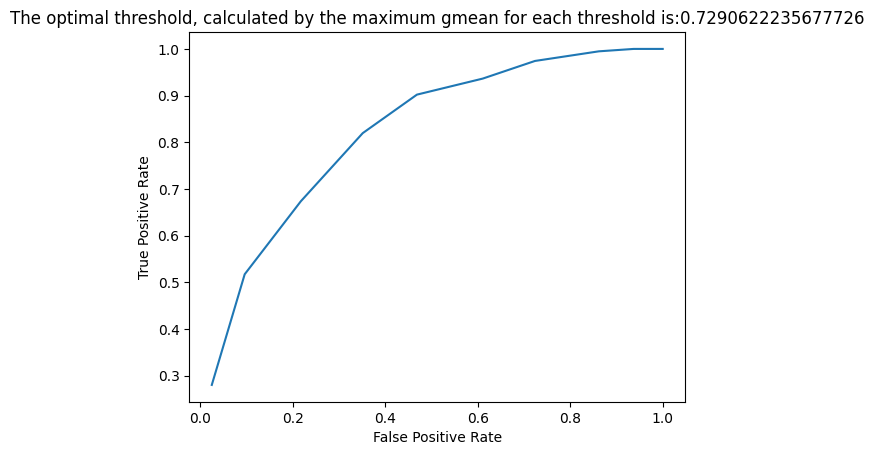

In [57]:
# Call of the function in Q.6

roc_curve(scaled_test_tar,test_preds)

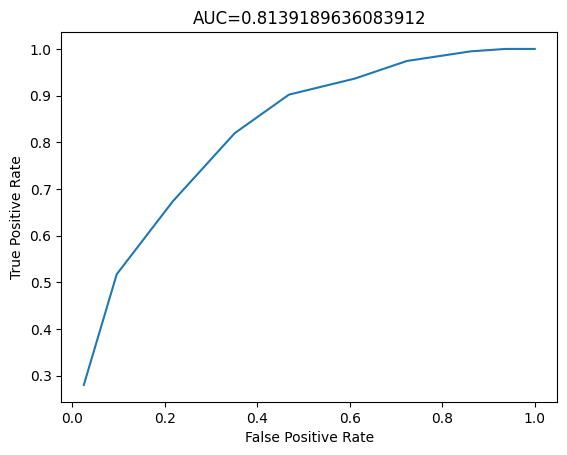

In [58]:
# Call of the function in Q.7

auc_score(scaled_test_tar,test_preds)

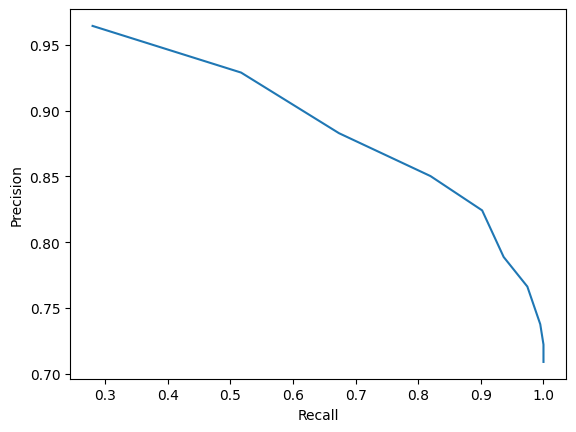

In [59]:
# Call of the function in Q.8

pr_curve(scaled_test_tar,test_preds)

In [60]:
z=1.96
p=g_error_final/100
std_error=(p*(1-p)/len(scaled_test_tar))**0.5

upper_bound=(p + z*(std_error))
lower_bound=(p - z*(std_error))
print(f"The 95% confidence interval on the generalization error is {upper_bound} - {lower_bound} ")

The 95% confidence interval on the generalization error is 0.23350374617406616 - 0.1781893110731933 
